In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from chainconsumer import ChainConsumer
from sbi_lens.config import config_lsst_y_10

In [2]:
# plot params

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["lines.linewidth"] = 1
plt.rcParams['lines.markersize'] = 3
color = [
   '#f8c471',
    '#d68910',
    '#cd6155',
    '#edbb99',
    '#5d6d7e',
    '#73c6b6',
    '#a3b899'
]

In [54]:
table = pd.read_table("../results/store_experiments.csv", sep=',') #results_bm_grad.csv

c2st_info = table.loc[(
    (table['sbi_method'] == 'nle') & (table['score_weight']==0.00000) & (table['c2st'] < 0.607) & (table['c2st'] > 0.599)& (table['nb_simulations'] == 1000)
)]

In [55]:
c2st_info

,experiment_id,sbi_method,total_steps,activ_fun,nb_simulations,score_weight,n_flow_layers,n_bijector_layers,seed,nf type,batch size,score type,score noise,c2st
83,exp_nle_70000_1000_3_4_2_silu_affine_128_0.0_u...,nle,70000,silu,1000,0.0,4,2,3,affine,128,unmarginal,0.0,0.6068
182,exp_nle_70000_1000_6_4_2_silu_affine_128_0.0_u...,nle,70000,silu,1000,0.0,4,2,6,affine,128,unmarginal,0.0,0.6030


In [51]:
exp_id = c2st_info['experiment_id'][83]
posterior = np.load('../results/experiments/{}/posteriors_sample.npy'.format(exp_id))

In [52]:
truth = config_lsst_y_10.truth
params_name = config_lsst_y_10.params_name_latex
path_to_access_sbi_lens = '/gpfswork/rech/eqw/ufa23yn'

sample_ff = np.load(
    f"{path_to_access_sbi_lens}/sbi_lens/sbi_lens/data/posterior_full_field__256N_10ms_27gpa_0.26se.npy"
)

# sample_ps = np.load(
#     f"{path_to_access_sbi_lens}/sbi_lens/sbi_lens/data/posterior_power_spectrum__256N_10ms_27gpa_0.26se.npy"
# )
sample_ps = np.load(
    "posterior_power_spectrum__256N_10ms_27gpa_0.26se.npy"
)

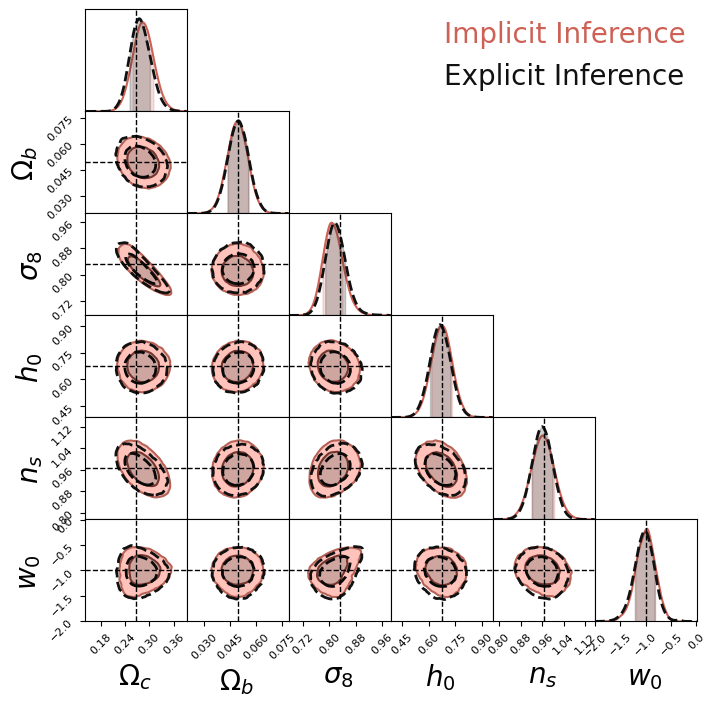

In [53]:
c = ChainConsumer()

c.add_chain(
        posterior,
        parameters=params_name,
        name='Implicit Inference',
        linewidth=1.5,
        color = color[2],
        shade_alpha = 0.5
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Explicit Inference',
        linewidth=2,
        color =  "#111111", #color[4], 
        shade_alpha = 0.,
        linestyle = '--'
)

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.8,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_cvg_c2st.pdf')

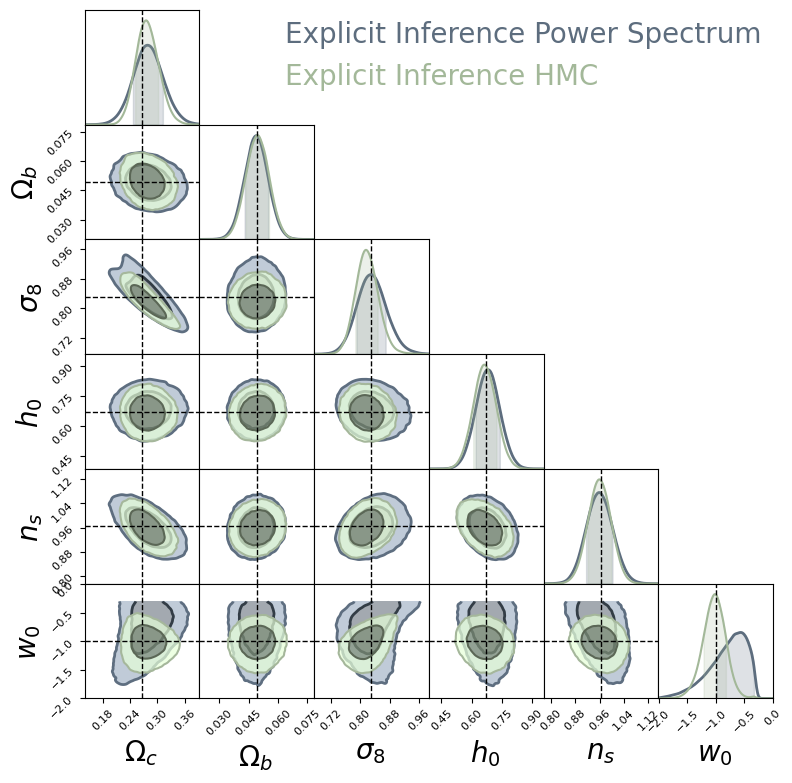

In [56]:
c = ChainConsumer()

c.add_chain(
        sample_ps,
        parameters=params_name,
        name='Explicit Inference Power Spectrum',
        linewidth=2,
        color =  color[4], #"#111111",
        shade_alpha = 0.5
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Explicit Inference HMC',
        linewidth=1.5,
        color = color[6],
        shade_alpha = 0.7
)

# c.add_chain(
#         sample_nd_vmim,
#         parameters=params_name,
#         name='Implicit Inference VMIM Compression',
#         linewidth=2,
#         color =  "#111111",
#         shade_alpha = 0.,
#         linestyle = '--'
# )

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.9,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)
# plt.tight_figure()
plt.savefig('contour_plot_sbi_lens.pdf')

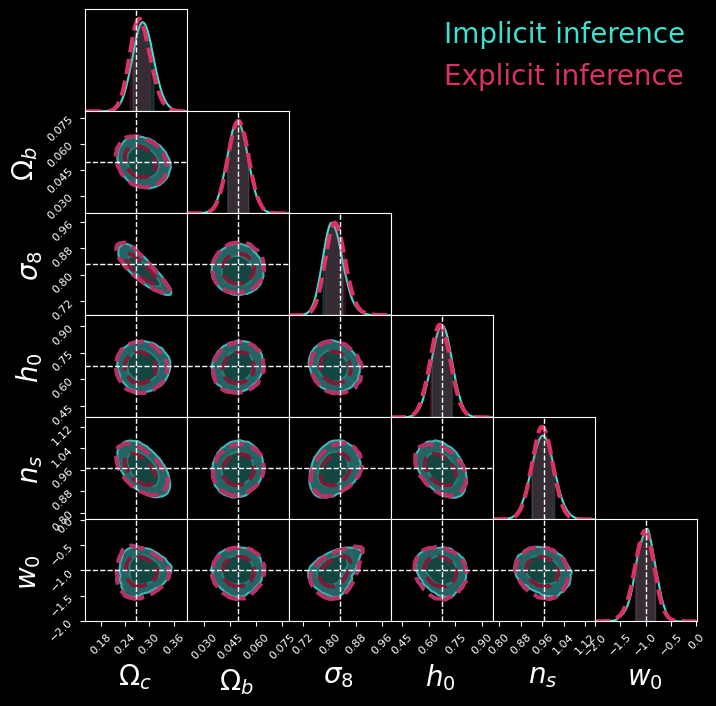

In [57]:
plt.style.use("dark_background")

c = ChainConsumer()

c.add_chain(
        posterior,
        parameters=params_name,
        name='Implicit inference',
        linewidth=1.5,
        color = "#40E0D0",
        shade_alpha = 0.4
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Explicit inference',
        linewidth=3,
        color =  "#DE3163",
        shade_alpha = 0.,
        linestyle = '--'
)

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
c.configure_truth(color='w', ls="--", linewidth=1.)

fig = c.plotter.plot(
    figsize=0.8,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_cvg_c2st.png', transparent=True)